# Tobermorite mineral formulas

[Sean Mulcahy](mailto:sean.mulcahy@wwu.edu), [Western Washington University](https://wp.wwu.edu/mulcahy)

This notebook is used to create Figures 3 and 4 in Jackson et al., 2017.  The code below does the following:
* calculate tobermorite formulas based on 18[O, (OH)] 
* propagate the 2-sigma standard deviation on the weight% oxide using the [Uncertainties](https://pythonhosted.org/uncertainties/numpy_guide.html) package
* plot tobermorite ternary diagrams using the [python-ternary](https://github.com/marcharper/python-ternary) package
* final publication figures were formatted in Adobe Illustrator

## Import the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import ternary 
from uncertainties import unumpy
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting options
# ---
%matplotlib inline
sns.set(style='ticks')

## Import the data

Import the EPMA tobermorite analyses and 2-sigma uncertainties on the weight% oxides.

In [2]:
# Weight percent oxides
df = pd.read_csv("../data/tobermorite-oxide.csv", index_col='Sample')

# 1-sigma absolute error from counting statistics
sigma = pd.read_csv("../data/tobermorite-oxide-sigma.csv", index_col='Sample')

## Create Uncertainty array and convert to Pandas data.frame

In [3]:
# Combine oxides and error into uncertainty array
ox = unumpy.uarray(df.values, 2.*sigma.values)

# Create pandas data.frame
oxides = pd.DataFrame(ox, index=df.index)

# Name columns with oxides
oxides.columns=list(df.columns.values)

# Show the data.frame
oxides.head()

,SiO2,TiO2,Al2O3,Cr2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O
Sample,,,,,,,,,,
Bai LL Clast 1,40.1+/-0.4,0.0+/-0,6.65+/-0.14,0.0+/-0,0.0+/-0,0.0+/-0,0.120+/-0.020,34.5+/-0.5,0.40+/-0.06,0.61+/-0.08
Bai LL Clast 3,38.4+/-0.4,0.0+/-0,6.20+/-0.12,0.0+/-0,0.0+/-0,0.0+/-0,0.18+/-0.04,32.7+/-0.5,1.52+/-0.10,1.03+/-0.10
Bai Pumlime 2,45.5+/-0.4,0.0+/-0,6.84+/-0.14,0.0+/-0,0.0+/-0,0.0+/-0,0.020+/-0.020,34.1+/-0.5,0.35+/-0.06,0.81+/-0.08
Bai Pumlime 4,47.6+/-0.4,0.0+/-0,6.08+/-0.12,0.0+/-0,0.0+/-0,0.0+/-0,0.0+/-0,34.5+/-0.5,0.84+/-0.08,0.95+/-0.10
Bai Pumlime 7,37.9+/-0.4,0.0+/-0,6.7+/-0.4,0.0+/-0,0.21+/-0.32,0.0+/-0,0.26+/-0.30,32.5+/-0.7,1.24+/-0.16,0.69+/-0.12


## Calculate cations and uncertainties

This method, using the [Uncertainties](https://pythonhosted.org/uncertainties/numpy_guide.html) package, accurately reproduces the results of [Giaramita and Day, 1990](http://www.minsocam.org/ammin/AM75/AM75_170.pdf) using partial error propagation. 

In [4]:
# Cations per oxide
cpo = [1., 1., 2., 2., 2., 1., 1., 1., 2., 2.]

# Anions per oxides
apo = [2., 2., 3., 3., 3., 1., 1., 1., 1., 1.]

# Atomic weight of the oxides
awo = [60.08, 79.88, 101.96, 151.99, 159.69, 70.94, 40.30, 56.08, 61.98, 94.20]

# Define functions
def fcat(x):
    return (x / awo) * cpo

def fox(x):
    return (x / awo) * apo

def f(x):
    return (x * ofact)

#def wtr(x):
#    return (2. * 9.0076/ofact + 2. * 4. * 9.0076/ofact)

# Calculate cations
cat = oxides.apply(fcat, axis = 1)
ox = oxides.apply(fox, axis = 1)
osum = ox.apply(sum, axis=1)

# Oxygen basis
ofact = 16./osum
cations = cat.apply(f)


# Sum each analysis (row)
CatSum = cations.apply(sum, axis=1)
cations.loc[:,'Total'] = CatSum

# Label the columns
cations.columns = ['Si', 'Ti', 'Al', 'Cr', 'Fe3', 'Mn', 'Mg', 'Ca', 'Na', 'K', 'Total']
cations.index = df.index

## Save the results to separate Pandas data.frames

In [5]:
# Cation formula units
cation_formula = pd.DataFrame(unumpy.nominal_values(cations))
cation_formula.columns =  ['Si', 'Ti', 'Al', 'Cr', 'Fe3', 'Mn', 'Mg', 'Ca', 'Na', 'K', 'Total']
cation_formula.index = df.index
cation_formula.to_csv("../data/tobermorite-cation.csv")

# Errors on cation formula units
cation_sigma = pd.DataFrame(unumpy.std_devs(cations))
cation_sigma.columns =  ['sSi', 'sTi', 'sAl', 'sCr', 'sFe3', 'sMn', 'sMg', 'sCa', 'sNa', 'sK', 'sTotal']
cation_sigma.index = df.index
cation_sigma.to_csv("../data/tobermorite-cation-error.csv")

## Si-Ca-Na+K ternary for analyzed samples

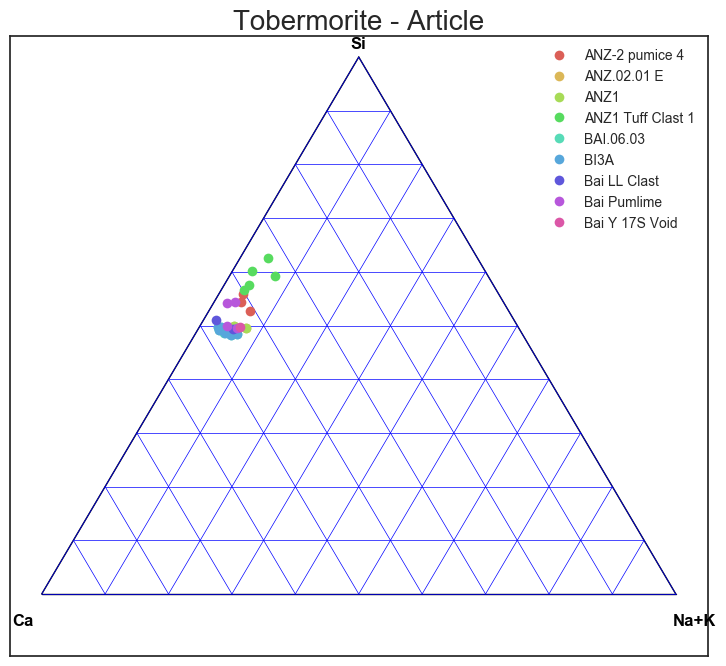

In [10]:
df = pd.read_csv('../data/tobermorite-cations-plotting.csv')

# Normlized plotting end-members
df['s'] = df.Si/(df.Si+df.Ca+df.Na+df.K)
df['c'] = df.Ca/(df.Si+df.Ca+df.Na+df.K)
df['nk'] = (df.Na+df.K)/(df.Si+df.Ca+df.Na+df.K)

groups=df.groupby('PlotGroup')

# Set up ternary plot
sns.set_palette("hls", 9)
figure, tax = ternary.figure(scale=100.0)
tax.boundary(linewidth=1.0)
tax.gridlines(linestyle="-", multiple=10) 

# Plot points by sample
for name, group in groups:
    nsc = 100*np.column_stack((group.nk, group.s, group.c))
    #np.savetxt(('../data/phillipsite2-ternary/'+str(name)+'.csv'), cmnk, delimiter=',')
    tax.plot(nsc, linestyle='', marker='o', ms=7, label=name)


# Set Axis labels and Title
fontsize = 20
tax.set_title('Tobermorite - Article', fontsize=fontsize)

plt.text(-3, -5, 'Ca', color='black', ha='center', fontweight='bold')
plt.text(103, -5, 'Na+K', color='black', ha='center', fontweight='bold')
plt.text(50, 88, 'Si', color='black', ha='center', fontweight='bold')

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.legend()

# Size figure
figure.set_figheight(8)
figure.set_figwidth(9)

plt.savefig('../figs/tobermorite-SCNK-jacksonetal.svg')

## Si-Ca-Al ternary for analyzed samples

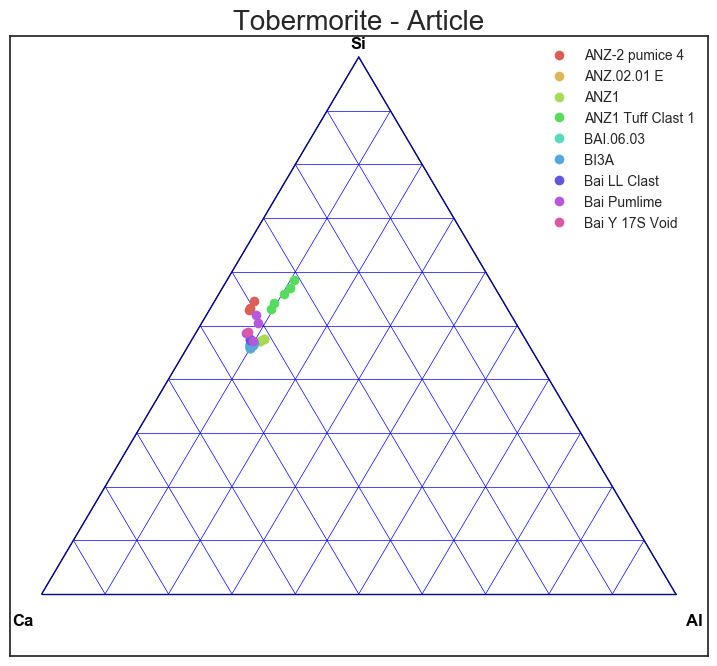

In [11]:
df = pd.read_csv('../data/tobermorite-cations-plotting.csv')

# Normlized plotting end-members
df['s'] = df.Si/(df.Si+df.Ca+df.Al)
df['c'] = df.Ca/(df.Si+df.Ca+df.Al)
df['a'] = df.Al/(df.Si+df.Ca+df.Al)

groups=df.groupby('PlotGroup')

# Set up ternary plot
sns.set_palette("hls", 9)
figure, tax = ternary.figure(scale=100.0)
tax.boundary(linewidth=1.0)
tax.gridlines(linestyle="-", multiple=10) 

# Plot points by sample
for name, group in groups:
    nsa = 100*np.column_stack((group.a, group.s, group.c))
    tax.plot(nsa, linestyle='', marker='o', ms=7, label=name)

# Set Axis labels and Title
fontsize = 20
tax.set_title('Tobermorite - Article', fontsize=fontsize)

plt.text(-3, -5, 'Ca', color='black', ha='center', fontweight='bold')
plt.text(103, -5, 'Al', color='black', ha='center', fontweight='bold')
plt.text(50, 88, 'Si', color='black', ha='center', fontweight='bold')
    
# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.legend()

# Size figure
figure.set_figheight(8)
figure.set_figwidth(9)

plt.savefig('../figs/tobermorite-SCA-jacksonetal.svg')

## Si-Ca-Na+K for previously published samples

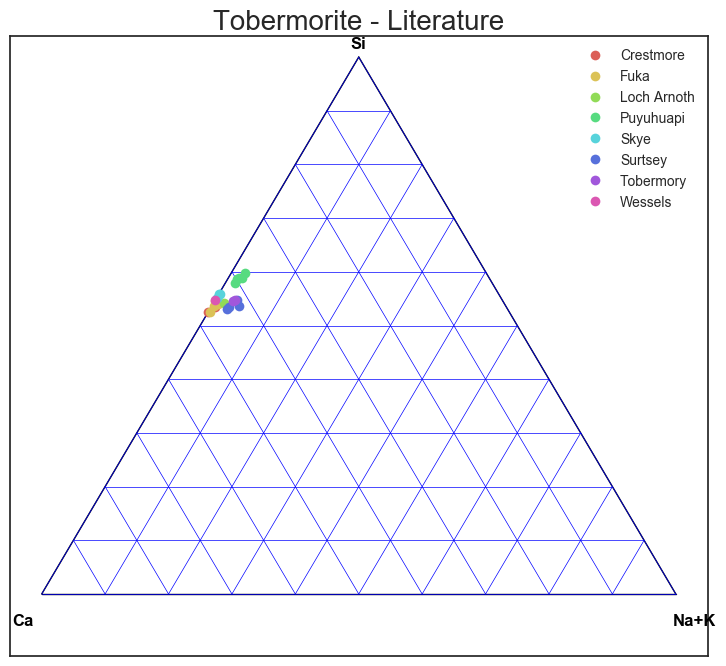

In [13]:
df = pd.read_csv('../data/tobermorite-literature.csv')

# Normlized plotting end-members
df['s'] = df.Si/(df.Si+df.Ca+df.Na+df.K)
df['c'] = df.Ca/(df.Si+df.Ca+df.Na+df.K)
df['nk'] = (df.Na+df.K)/(df.Si+df.Ca+df.Na+df.K)

groups=df.groupby('PlotGroup')

# Set up ternary plot
sns.set_palette("hls", 8)
figure, tax = ternary.figure(scale=100.0)
tax.boundary(linewidth=1.0)
tax.gridlines(linestyle="-", multiple=10) 

# Plot points by sample
for name, group in groups:
    nsc = 100*np.column_stack((group.nk, group.s, group.c))
    #np.savetxt(('../data/phillipsite2-ternary/'+str(name)+'.csv'), cmnk, delimiter=',')
    tax.plot(nsc, linestyle='', marker='o', ms=7, label=name)

# Set Axis labels and Title
fontsize = 20
tax.set_title('Tobermorite - Literature', fontsize=fontsize)

plt.text(-3, -5, 'Ca', color='black', ha='center', fontweight='bold')
plt.text(103, -5, 'Na+K', color='black', ha='center', fontweight='bold')
plt.text(50, 88, 'Si', color='black', ha='center', fontweight='bold')

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.legend()

# Size figure
figure.set_figheight(8)
figure.set_figwidth(9)

plt.savefig('../figs/tobermorite-SCNK-published.svg')

## Si-Ca-Al ternary for previously published samples

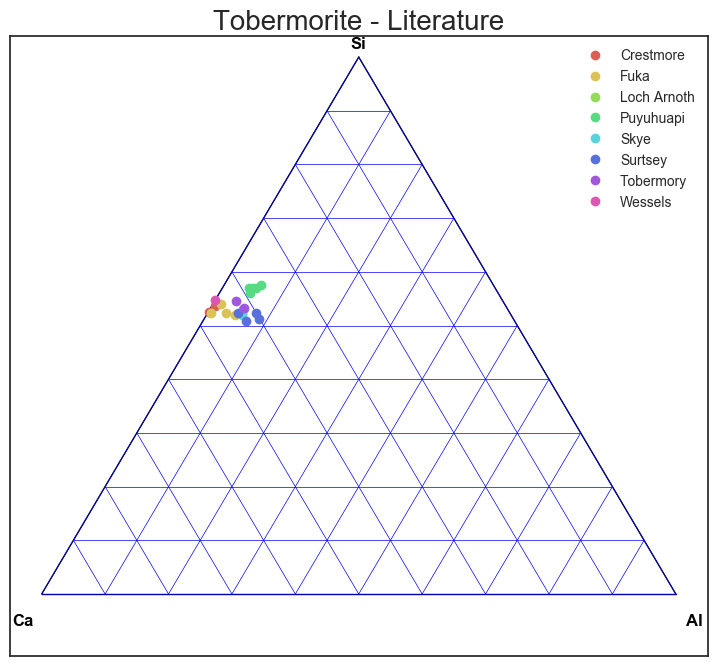

In [15]:
df = pd.read_csv('../data/tobermorite-literature.csv')

# Normlized plotting end-members
df['s'] = df.Si/(df.Si+df.Ca+df.Al)
df['c'] = df.Ca/(df.Si+df.Ca+df.Al)
df['a'] = df.Al/(df.Si+df.Ca+df.Al)

groups=df.groupby('PlotGroup')

# Set up ternary plot
sns.set_palette("hls", 8)
figure, tax = ternary.figure(scale=100.0)
tax.boundary(linewidth=1.0)
tax.gridlines(linestyle="-", multiple=10) 

# Plot points by sample
for name, group in groups:
    nsa = 100*np.column_stack((group.a, group.s, group.c))
    tax.plot(nsa, linestyle='', marker='o', ms=7, label=name)

# Set Axis labels and Title
fontsize = 20
tax.set_title('Tobermorite - Literature', fontsize=fontsize)

plt.text(-3, -5, 'Ca', color='black', ha='center', fontweight='bold')
plt.text(103, -5, 'Al', color='black', ha='center', fontweight='bold')
plt.text(50, 88, 'Si', color='black', ha='center', fontweight='bold')  
    
# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.legend()

# Size figure
figure.set_figheight(8)
figure.set_figwidth(9)

plt.savefig('../figs/tobermorite-SCA-published.svg')